In [1]:
import pandas as pd
import seaborn as sns

In [2]:
diagnoses = pd.read_csv('DIAGNOSES_ICD.csv')

In [3]:
DM2codes = ['25000','25002','25010','25012','25020','25022','25030','25032',
         '25040','25042','25050','25052','25060','25062','25070','25072',
         '25080','25082''25090','25092']

In [4]:
DM2patients = []
for index,row in diagnoses.iterrows():
    if(row['ICD9_CODE'] in DM2codes):
        DM2patients.append(row['SUBJECT_ID'])
DM2patients = list(set(DM2patients))

In [5]:
print(len(DM2patients))

9439


In [6]:
admissions = pd.read_csv('ADMISSIONS.csv')

In [7]:
allPatients = []
multipleVisits = []
for index,row in admissions.iterrows():
    if(row['SUBJECT_ID'] in allPatients):
        multipleVisits.append(row['SUBJECT_ID'])
    else:
        allPatients.append(row['SUBJECT_ID'])
multipleVisits = list(set(multipleVisits))

In [8]:
print(len(multipleVisits))

7537


In [9]:
DM2multiVisits = []
for patient in multipleVisits:
    if patient in DM2patients:
        DM2multiVisits.append(patient)

In [10]:
print(len(DM2multiVisits))

2498


In [11]:
Num_Visits_Lib = {}
for index, row in admissions.iterrows():
    if(row['SUBJECT_ID'] in DM2multiVisits):
        if(row['SUBJECT_ID'] in Num_Visits_Lib):
            Num_Visits_Lib[row['SUBJECT_ID']] += 1;
        else:
            Num_Visits_Lib[row['SUBJECT_ID']] = 1; 
    

In [12]:
df = pd.DataFrame(columns=['patient','times_visited'])
for patient,visits in Num_Visits_Lib.items():
    new_row = pd.DataFrame([[patient,visits]],columns=['patient','times_visited'])
    df = df.append(new_row)    

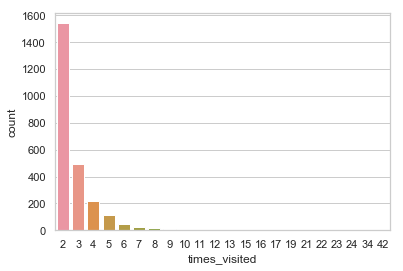

In [13]:
sns.set(style="whitegrid")
ax = sns.countplot(x="times_visited", data=df)

In [14]:
Hadm_Lib = {}
for index,row in admissions.iterrows():
    if(row['SUBJECT_ID'] in DM2multiVisits):
        Hadm_Lib.setdefault(row['SUBJECT_ID'], []).append(row['HADM_ID'])

In [15]:
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        return True 
    else: 
        return False

In [16]:
all_hadm = []
for patient,hadm in Hadm_Lib.items():
    for x in hadm:
        all_hadm.append(x)  

In [17]:
All_Hadm_Lib = {}
for index,row in diagnoses.iterrows():
    if(row['HADM_ID'] in all_hadm):
        All_Hadm_Lib.setdefault(row['HADM_ID'], []).append(row['ICD9_CODE'])

In [18]:
masterDF = pd.DataFrame(columns=['hadm_id','diabeties code'])
for hadm,codes in All_Hadm_Lib.items():
    code_list = []
    for code in codes:
        code_list.append(code)
    new_row = pd.DataFrame([[hadm,(common_member(code_list,DM2codes))]],columns=['hadm_id','diabeties code'])
    masterDF = masterDF.append(new_row)       

In [19]:
#print(masterDF)

In [20]:
no_diabetes = []
yes_diabetes = []
for index,row in masterDF.iterrows():
    if (row['diabeties code'] == False):
        no_diabetes.append(row['hadm_id'])
    else:
        yes_diabetes.append(row['hadm_id'])

In [21]:
print(len(no_diabetes))
print(len(yes_diabetes))

1658
5505


In [22]:
masterDF['SUBJECT_ID'] = 0
masterDF = masterDF.reset_index(drop=True)

In [24]:
for patient,hadm in Hadm_Lib.items():
    for index,row in masterDF.iterrows():
        if row['hadm_id'] in hadm:
            masterDF.at[index, 'SUBJECT_ID'] = patient

In [31]:
print(masterDF.head(5))

  hadm_id diabeties code  SUBJECT_ID
0  140784           True         117
1  164853           True         117
2  113323           True         130
3  198214           True         130
4  192180          False         135


In [28]:
POI = []
for index,row in masterDF.iterrows():
    if(row['diabeties code'] == False):
        POI.append(row['SUBJECT_ID'])
POI = list(set(POI))

In [30]:
print(len(POI))

1009
